In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# L1 - T1 : Top Cuisines

**Determine thea top three most common cuisines in the dataset**

In [9]:
rest_df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [10]:
cuisines_series = rest_df['Cuisines'].str.split(', ').explode()
cuisine_counts = cuisines_series.value_counts()

top_3_cuisines = cuisine_counts.head(3)

print('Top three most common cuisines are: ')
print(top_3_cuisines)

Top three most common cuisines are: 
North Indian    3960
Chinese         2735
Fast Food       1986
Name: Cuisines, dtype: int64


**Calculate the percentage of restaurants that serve each of the top cuisines**

In [11]:
total_restaurants = len(rest_df)

cuisine_percentages = {}

for cuisine, count in top_3_cuisines.items():
    percentage = (count / total_restaurants) * 100
    cuisine_percentages[cuisine] = percentage

print("\nPercentage of Restaurants for Each Top Cuisine:")

for cuisine, percentage in cuisine_percentages.items():
    print(f"{cuisine}: {percentage:.2f}%")


Percentage of Restaurants for Each Top Cuisine:
North Indian: 41.50%
Chinese: 28.66%
Fast Food: 20.81%


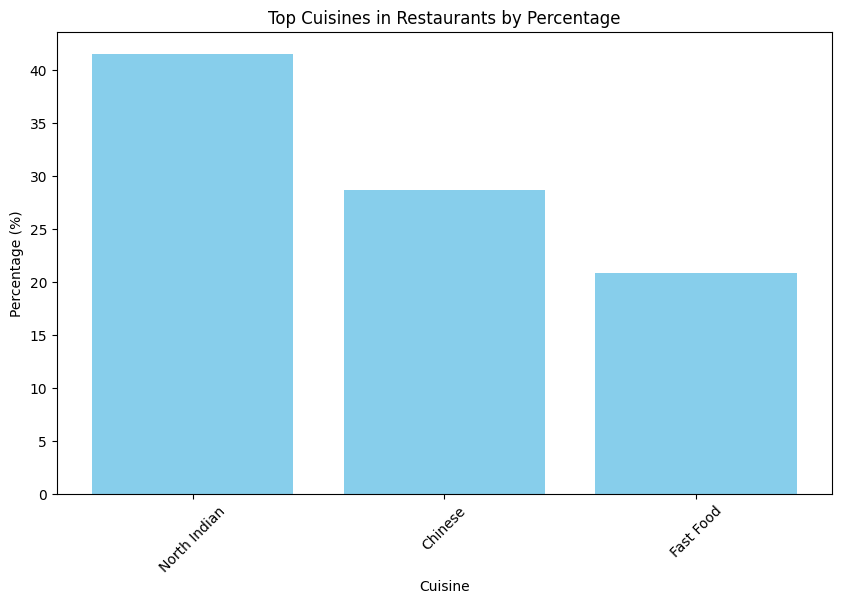

In [12]:
cuisines = list(cuisine_percentages.keys())
percentages = list(cuisine_percentages.values())
plt.figure(figsize=(10, 6))
plt.bar(cuisines, percentages, color='skyblue')
plt.xlabel('Cuisine')
plt.ylabel('Percentage (%)')
plt.title('Top Cuisines in Restaurants by Percentage')
plt.xticks(rotation=45)

plt.show()

# L1 - T2 : City Analysis

**Identify the city with the highest number of restaurants in the dataset**

In [13]:
city_with_highest_restaurant = rest_df.groupby('Restaurant Name')['City'].sum().value_counts()
print('city with the highest number of restaurants: ')
print(city_with_highest_restaurant.head(1))

city with the highest number of restaurants: 
New Delhi    3739
Name: City, dtype: int64


**Calculate the average rating for restaurants in each city**

In [14]:
average_restaurant_city_rating = rest_df.groupby('City')['Aggregate rating'].mean()
print('the average rating for restaurants in each city: ')
print(average_restaurant_city_rating)

the average rating for restaurants in each city: 
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64


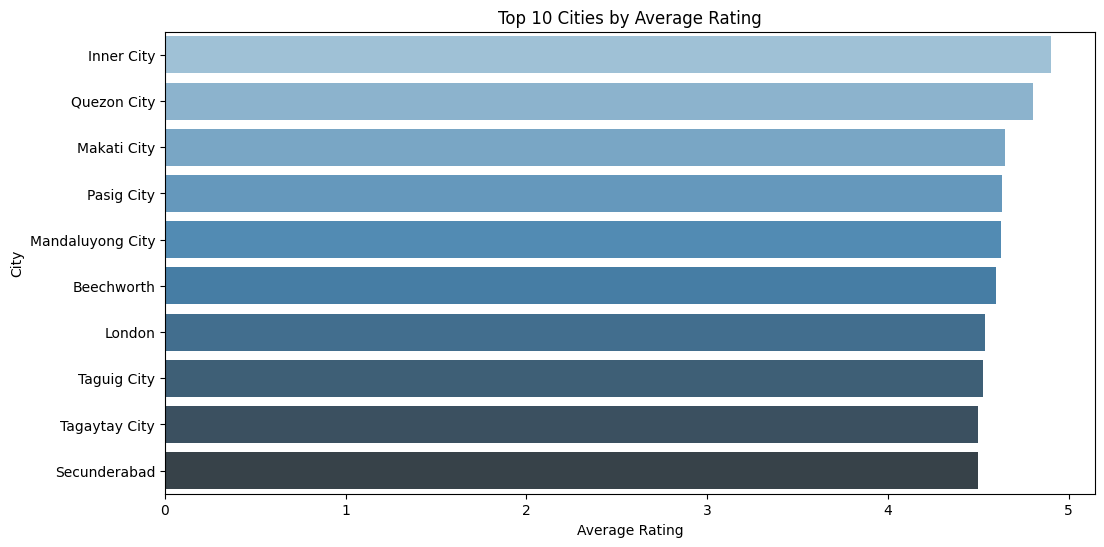

In [15]:
top_10_cities = average_restaurant_city_rating.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="Blues_d")

plt.xlabel('Average Rating')
plt.ylabel('City')
plt.title('Top 10 Cities by Average Rating')

plt.show()

**Determine the city with the highest average rating**

In [ ]:
top_1_city = average_restaurant_city_rating.idxmax()
print(f"The city with the highest average rating is: {top_1_city}")

The city with the highest average rating is: Inner City


# L1 - T3 : Price Range Distribution

**Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants**

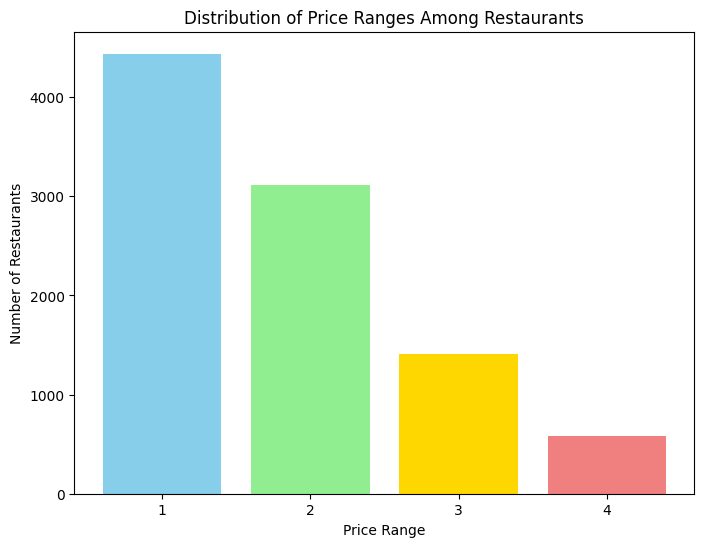

In [ ]:
price_range_counts = rest_df['Price range'].value_counts()

price_range_order = [1, 2, 3, 4]
colors = ['skyblue', 'lightgreen', 'gold', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.bar(price_range_counts.index, price_range_counts, tick_label=price_range_counts.index, color=colors)

plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xticks(price_range_order)
plt.show()

**Calculate the percentage of restaurants in each price range category**

In [ ]:
price_range_counts = rest_df['Price range'].value_counts()

total_restaurants = len(rest_df)

pricerange_percentages = {}

for price, count in price_range_counts.items():
    percentage = (count / total_restaurants) * 100
    pricerange_percentages[price] = percentage

print("\nPercentage of Restaurants for Each Price Range Category:")
for price, percentage in pricerange_percentages.items():
    print(f"Price Range {price}: {percentage:.2f}%")


Percentage of Restaurants for Each Price Range Category:
Price Range 1: 46.51%
Price Range 2: 32.62%
Price Range 3: 14.72%
Price Range 4: 6.14%


# L1 - T4 : Online Delivery

**Determine the percentage of restaurants that offer online delivery**

In [ ]:
percentage_of_online_delivery = (rest_df['Has Online delivery'] == 'Yes').mean() * 100

print(f"The percentage of restaurants that offer online delivery is: {percentage_of_online_delivery:.2f}%")

The percentage of restaurants that offer online delivery is: 25.69%


**Compare the average ratings of restaurants with and without online delivery**

In [ ]:
percentage_of_online_delivery = (rest_df['Has Online delivery'] == 'Yes').mean() * 100
percentage_of_offline_delivery = (rest_df['Has Online delivery'] == 'No').mean() * 100
print(f"The percentage of restaurants that offer online delivery is: {percentage_of_online_delivery:.2f}%")
print(f"The percentage of restaurants that offer online delivery is: {percentage_of_offline_delivery:.2f}%")

The percentage of restaurants that offer online delivery is: 25.69%
The percentage of restaurants that offer online delivery is: 74.31%


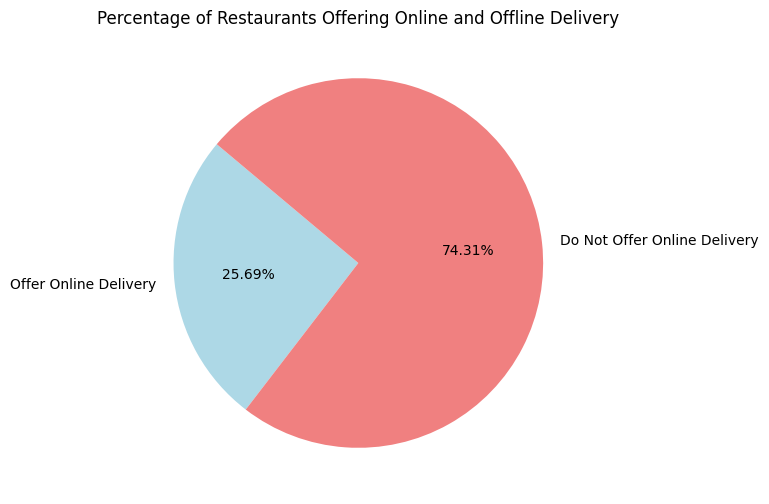

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([percentage_of_online_delivery, percentage_of_offline_delivery], labels=['Offer Online Delivery', 'Do Not Offer Online Delivery'], colors=['lightblue', 'lightcoral'], autopct='%1.2f%%', startangle=140)
plt.title('Percentage of Restaurants Offering Online and Offline Delivery')
plt.show()

*The diagram resembles the shape of a Pac-Man character.*